In [23]:
#import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats

In [3]:
#download the fata
df = pd.read_csv('all_data.csv')
print(df.head)


<bound method NDFrame.head of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>


In [18]:
#reanme 'Life expectancy at birth (years)'
df.rename(columns={'Life expectancy at birth (years)': 'life_exp'}, inplace=True)
print(df.head(20))


   Country  Year  life_exp           GDP
0    Chile  2000      77.3  7.786093e+10
1    Chile  2001      77.3  7.097992e+10
2    Chile  2002      77.8  6.973681e+10
3    Chile  2003      77.9  7.564346e+10
4    Chile  2004      78.0  9.921039e+10
5    Chile  2005      78.4  1.229650e+11
6    Chile  2006      78.9  1.547880e+11
7    Chile  2007      78.9  1.736060e+11
8    Chile  2008      79.6  1.796380e+11
9    Chile  2009      79.3  1.723890e+11
10   Chile  2010      79.1  2.185380e+11
11   Chile  2011      79.8  2.522520e+11
12   Chile  2012      79.9  2.671220e+11
13   Chile  2013      80.1  2.783840e+11
14   Chile  2014      80.3  2.609900e+11
15   Chile  2015      80.5  2.425180e+11
16   China  2000      71.7  1.211350e+12
17   China  2001      72.2  1.339400e+12
18   China  2002      72.7  1.470550e+12
19   China  2003      73.1  1.660290e+12


In [22]:
#descriptive statistic: explore the data
print(df.describe())
print('list of countries:')
print(df['Country'].unique())
country_desc = df.groupby('Country') 
print(country_desc)

              Year   life_exp           GDP
count    96.000000  96.000000  9.600000e+01
mean   2007.500000  72.789583  3.880499e+12
std       4.633971  10.672882  5.197561e+12
min    2000.000000  44.300000  4.415703e+09
25%    2003.750000  74.475000  1.733018e+11
50%    2007.500000  76.750000  1.280220e+12
75%    2011.250000  78.900000  4.067510e+12
max    2015.000000  81.000000  1.810000e+13
list of countries:
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [11]:
#variables for each country
#print(df['Country'].unique())
#my_dict = {}
countries_list = df['Country'].unique()
#for country in countries_list:
 #   my_dict[country] = df[df['Country'] == country]
#print(my_dict)

Chile= df[df['Country'] == 'Chile']
China= df[df['Country'] == 'China']
Germany = df[df['Country'] == 'Germany']
Mexico= df[df['Country'] == 'Mexico']
USA= df[df['Country'] == 'United States of America']
Zimbabwe= df[df['Country'] == 'Zimbabwe']
print(USA.head())
print(Germany.head())


                     Country  Year  life_exp           GDP
64  United States of America  2000      76.8  1.030000e+13
65  United States of America  2001      76.9  1.060000e+13
66  United States of America  2002      77.0  1.100000e+13
67  United States of America  2003      77.2  1.150000e+13
68  United States of America  2004      77.5  1.230000e+13
    Country  Year  life_exp           GDP
32  Germany  2000      78.0  1.949950e+12
33  Germany  2001      78.3  1.950650e+12
34  Germany  2002      78.4  2.079140e+12
35  Germany  2003      78.5  2.505730e+12
36  Germany  2004      79.1  2.819250e+12


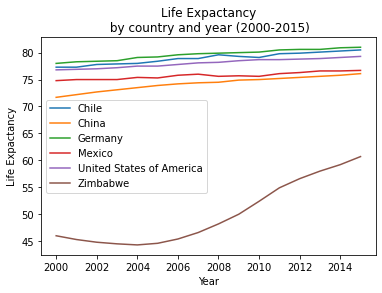

In [12]:
#Has life expectancy increased over time in the six nations?
for country in countries_list:
    my_country = df[df['Country'] == country]
    plt.plot(my_country['Year'],my_country['life_exp'], label = country)
#plt.plot(Chile['Year'],Chile['life_exp'], label = 'Chile' )
#plt.plot(China['Year'],China['life_exp'], label = 'China' )
#plt.plot(Germany['Year'],Germany['life_exp'] , label = 'Germany')
#plt.plot(Mexico['Year'],Mexico['life_exp'], label = 'Mexico' )
#plt.plot(USA['Year'],USA['life_exp'], label = 'USA' )
#plt.plot(Zimbabwe['Year'],Zimbabwe['life_exp'], label = 'Zimbabwe' )
plt.xlabel('Year')
plt.ylabel('Life Expactancy')
plt.title('Life Expactancy\n by country and year (2000-2015)')
plt.legend()
plt.show()


3880498570768.396


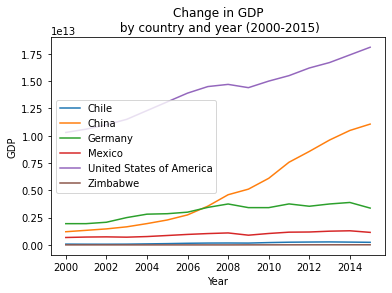

In [14]:
#Has GDP increased over time in the six nations?
print(np.mean(df['GDP']))
#plt.plot(Chile['Year'],Chile['GDP'], label = 'Chile' )
#plt.plot(China['Year'],China['GDP'], label = 'China' )
#plt.plot(Germany['Year'],Germany['GDP'] , label = 'Germany')
#plt.plot(Mexico['Year'],Mexico['GDP'], label = 'Mexico' )
#plt.plot(USA['Year'],USA['GDP'], label = 'USA' )
#plt.plot(Zimbabwe['Year'],Zimbabwe['GDP'], label = 'Zimbabwe' )
for country in countries_list:
    my_country = df[df['Country'] == country]
    plt.plot(my_country['Year'],my_country['GDP'], label = country)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Change in GDP\n by country and year (2000-2015)')
plt.legend()
plt.show()


In [24]:
#Is there a correlation between GDP and life expectancy of a country?

scipy.stats.pearsonr(df['GDP'], df['life_exp'])

(0.343206748449156, 0.0006187129569469811)

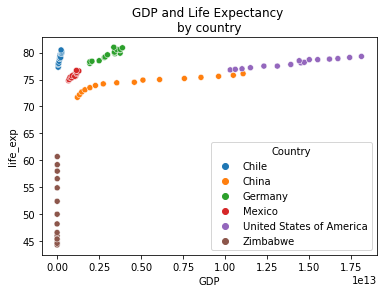

In [59]:
sb.scatterplot(x="GDP",
                    y="life_exp",
                    hue="Country",
                    data=df)
plt.title('GDP and Life Expectancy \nby country')
plt.show()

In [44]:
# life expectancy average in each country

#for country in countries_list:
 #   print(np.average)
life_exp_average_by_country = df.groupby('Country')['life_exp'].mean()
print(life_exp_average_by_country)

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_exp, dtype: float64


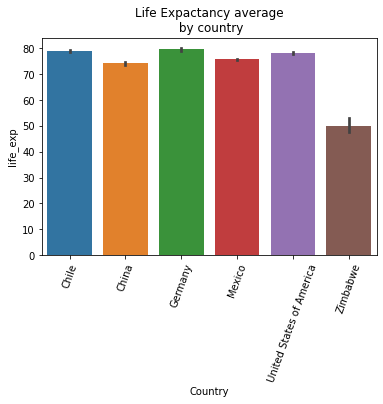

In [50]:
sb.barplot(data = df, x = 'Country', y = 'life_exp')
plt.xticks(rotation=70)
plt.title('Life Expactancy average\n by country')
plt.show()

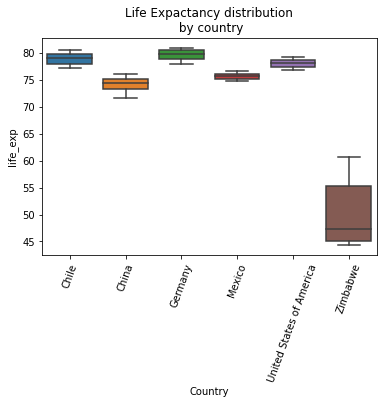

In [52]:
#What is the distribution of that life expectancy?
sb.boxplot(data = df, x = 'Country', y = 'life_exp')
plt.xticks(rotation=70)
plt.title('Life Expactancy distribution\n by country')
plt.show()
